<h1><b> 2011 Tohoku earthquake and tsunami </b></h1>

Prepared by Muhammad Zahin Bin Zainal Abidin

On 11 March 2011, at 14:46 JST (05:46 UTC), a Mw 9.0-9.1 undersea megathrust earthquake occurred in the Pacific Ocean, 72 km (45 mi) east of the Oshika Peninsula of the Tohoku region. It lasted approximately six minutes, causing a tsunami. It is sometimes known in Japan as the "Great East Japan Earthquake", among other names.

<img src=https://upload.wikimedia.org/wikipedia/commons/2/23/2011_Japan_shakemap.jpg >

This first cell is used to import the functions required for the analysis in this notebook.

In [22]:
import os
import pandas as pd
# import matplotlib pyplot so that we will be able to create plots in a similar way as MATLAB
import matplotlib.pyplot as plt

# import UTCDateTime from obspy for best precision in time variable
from obspy import UTCDateTime, read, read_inventory
from obspy.geodetics import gps2dist_azimuth
from obspy.clients.fdsn.mass_downloader import CircularDomain, Restrictions, MassDownloader

# import client to access IRIS database to pull earthquake data 
from obspy.clients.fdsn import Client
from mpl_toolkits.basemap import Basemap
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
client = Client("IRIS")

<b>Set Search Parameters Here</b>

Below we will set the parameters needed to request earthquake data from our catalog. We will use the start and end time around 10-12 March 2011 and latitude and longitude of (38.322,142.369.

In [3]:
catstartt = UTCDateTime("2011-03-10")
catendt = UTCDateTime("2011-03-12")
lon = 142.369
lat = 38.322
rad = 1
cat = client.get_events(starttime=catstartt, endtime=catendt, latitude=lat, longitude=lon, maxradius=rad, minmagnitude=8)

As you can see below the 9.1 magnitude earthquake is the only event found. This is the earthquake that led to the devastating tsunami. The details given are the time of the event, latitude, longitude and magnitude.

In [4]:
print(cat)

1 Event(s) in Catalog:
2011-03-11T05:46:23.200000Z | +38.296, +142.498 | 9.1  MW


Below is a map showing the surface location for the event. It occured off the Sendai coastline of Japan.

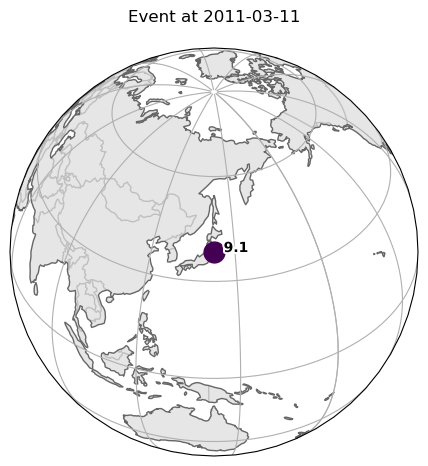

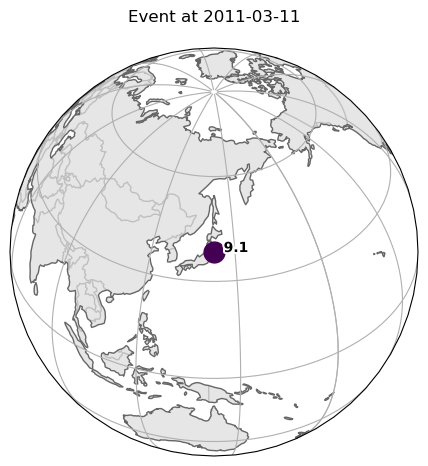

In [5]:
cat.plot(projection="ortho")

Using the Wilber3 service from Iris(http://ds.iris.edu/wilber3/find_event). I found that the nearest network was the JP network which measured this earthquake. Therefore, below the cells find and show the stations of this network which I can extract the seismograms for the event from.

In [7]:
inv = client.get_stations(network="JP", station="*", channel="BHZ", level="channel", starttime=UTCDateTime("2011-03-11T05:45:23.20000"), endtime=UTCDateTime("2011-03-11T06:25:23.200000"), minlatitude="30.296", maxlatitude="40.276", minlongitude="130.298", maxlongitude="150.298")


In [8]:
print(inv)

Inventory created at 2023-08-22T06:34:59.908100Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2011-03-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			JP
		Stations (11):
			JP.JGF (Gifu Kurokawa)
			JP.JHJ2 (Hachijojima Island)
			JP.JHS (Hiroshima Saijyo)
			JP.JMM (Miyagi Marumori)
			JP.JMN (Kochi Monobe)
			JP.JNU (Oita Nakatsue)
			JP.JSD (Sado)
			JP.JSG (Shizuoka Sagara)
			JP.JSU (Kagoshima Suzuyama)
			JP.JWT (Kyoto Wachi)
			JP.JYT (Ibaraki Yasato)
		Channels (11):
			JP.JGF..BHZ, JP.JHJ2..BHZ, JP.JHS..BHZ, JP.JMM..BHZ, JP.JMN..BHZ, 
			JP.JNU..BHZ, JP.JSD..BHZ, JP.JSG..BHZ, JP.JSU..BHZ, JP.JWT..BHZ, 
			JP.JYT..BHZ


The cells below reads in a stream of seismic time series data for the event, using the JP network. The IRIS web services is used to acquire the data.

In [9]:
st = read("https://service.iris.edu/fdsnws/dataselect/1/query?net=JP&cha=BHZ&starttime=2011-03-11T05:45:23.200000&endtime=2011-03-11T06:25:23.200000&format=miniseed&nodata=404")


In [10]:
print(st)

7 Trace(s) in Stream:
JP.ASAJ..BHZ | 2011-03-11T05:45:23.200000Z - 2011-03-11T06:25:23.200000Z | 20.0 Hz, 48001 samples
JP.CBIJ..BHZ | 2011-03-11T05:45:23.200000Z - 2011-03-11T06:25:23.200000Z | 20.0 Hz, 48001 samples
JP.JHJ2..BHZ | 2011-03-11T05:45:23.200000Z - 2011-03-11T06:25:23.200000Z | 20.0 Hz, 48001 samples
JP.JNU..BHZ  | 2011-03-11T05:45:23.200000Z - 2011-03-11T06:25:00.950000Z | 20.0 Hz, 47556 samples
JP.JNU..BHZ  | 2011-03-11T06:25:14.000000Z - 2011-03-11T06:25:14.950000Z | 20.0 Hz, 20 samples
JP.JOW..BHZ  | 2011-03-11T05:45:23.200000Z - 2011-03-11T06:25:23.200000Z | 20.0 Hz, 48001 samples
JP.YOJ..BHZ  | 2011-03-11T05:45:23.200000Z - 2011-03-11T06:25:23.200000Z | 20.0 Hz, 48001 samples


Below is a plot of each of the seven traces gathered. You can celarly see for both JNU stations the data is either noisy or not representative of the event. Therefore they are removed from the stream as are of no use.


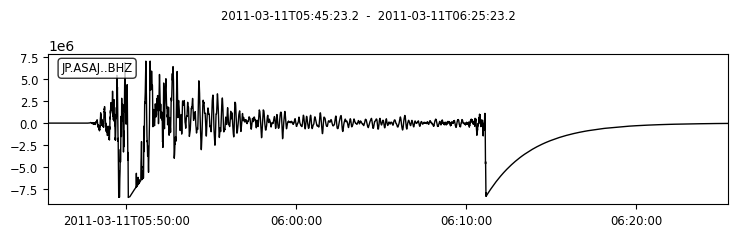

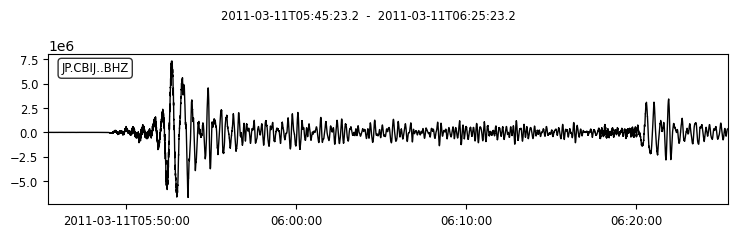

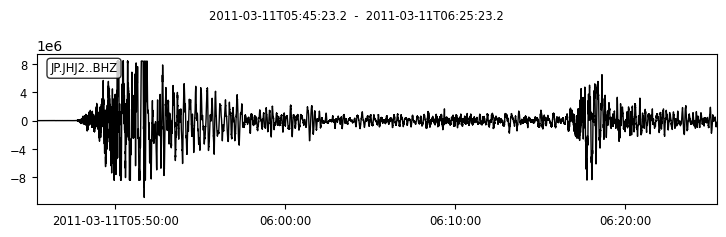

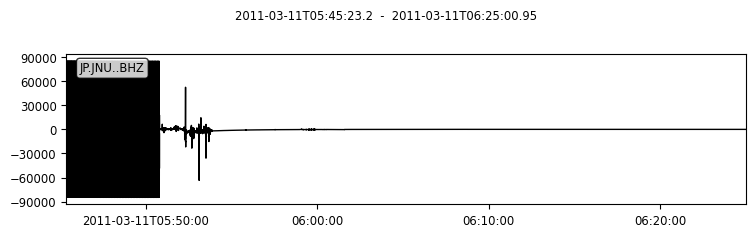

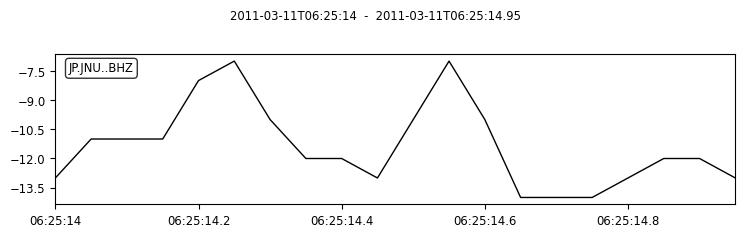

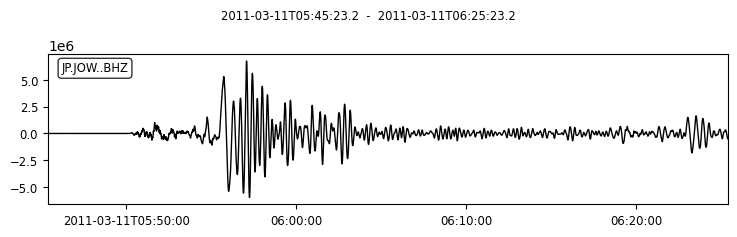

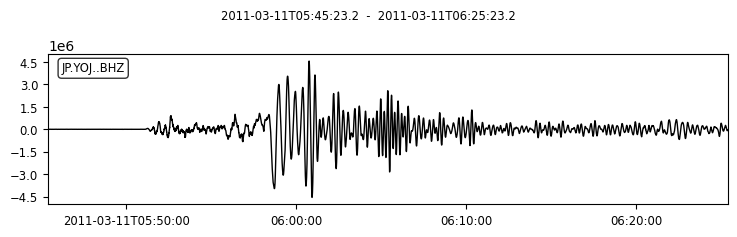

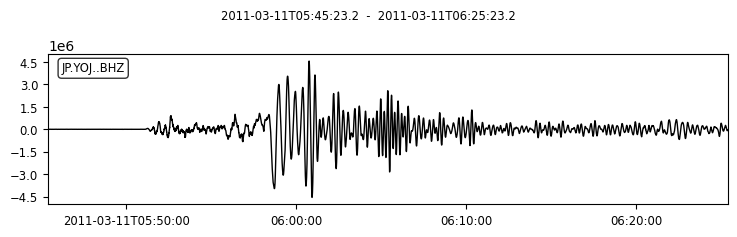

In [11]:
tr0 = st[0]
tr1 = st[1]
tr2 = st[2]
tr3 = st[3]
tr4 = st[4]
tr5 = st[5]
tr6 = st[6]
tr0.plot()
tr1.plot()
tr2.plot()
tr3.plot()
tr4.plot()
tr5.plot()
tr6.plot()


In [12]:
for tr in st.select(station="JNU"):
    st.remove(tr)


In [13]:
print(st)

5 Trace(s) in Stream:
JP.ASAJ..BHZ | 2011-03-11T05:45:23.200000Z - 2011-03-11T06:25:23.200000Z | 20.0 Hz, 48001 samples
JP.CBIJ..BHZ | 2011-03-11T05:45:23.200000Z - 2011-03-11T06:25:23.200000Z | 20.0 Hz, 48001 samples
JP.JHJ2..BHZ | 2011-03-11T05:45:23.200000Z - 2011-03-11T06:25:23.200000Z | 20.0 Hz, 48001 samples
JP.JOW..BHZ  | 2011-03-11T05:45:23.200000Z - 2011-03-11T06:25:23.200000Z | 20.0 Hz, 48001 samples
JP.YOJ..BHZ  | 2011-03-11T05:45:23.200000Z - 2011-03-11T06:25:23.200000Z | 20.0 Hz, 48001 samples


Below I have plotted the first 10 minutes of each of the five seismograms. This is used to gain an limited understanding of the background noise for each station. Only stations JHJ2 and YOJ seem to have a noticable background noise. The frequency of the background noise seems to be around 0.5Hz. This low frequency could be noise due to waves breaking on the shoreline of Japan. This is the likely culprit as sea waves have a frequency of between 0.1-1.0Hz.

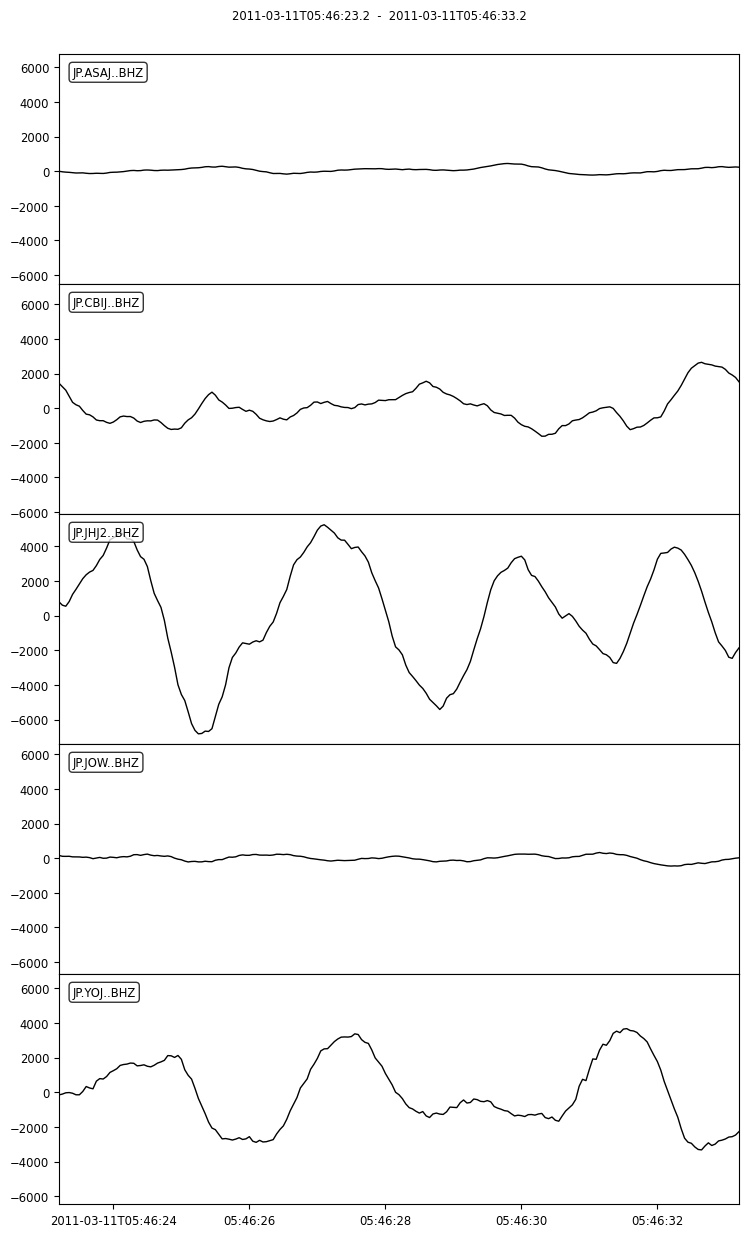

[443, 2647, -6825, -457, 3673]


In [14]:
dt = UTCDateTime("2011-03-11T05:46:23.200000")
st2 = st.copy()
st2.trim(dt, dt+10)
st2.plot()
print(st2.max())



The cell below shows the spectrogram for all five traces used. It is clear to see there is a spike just before or after the 500 seconds mark which represents the energy from the main shock. The frequency is quite low around 2-6Hz. For the top three stations it is clear to see that there was a second event that occured nearly 1000s later with a similar spectral signature at that time. This may represent a strong aftershock event.

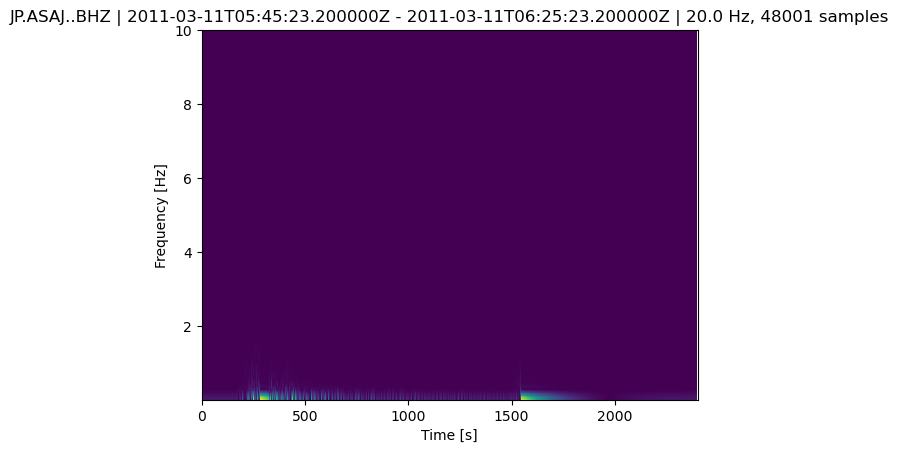

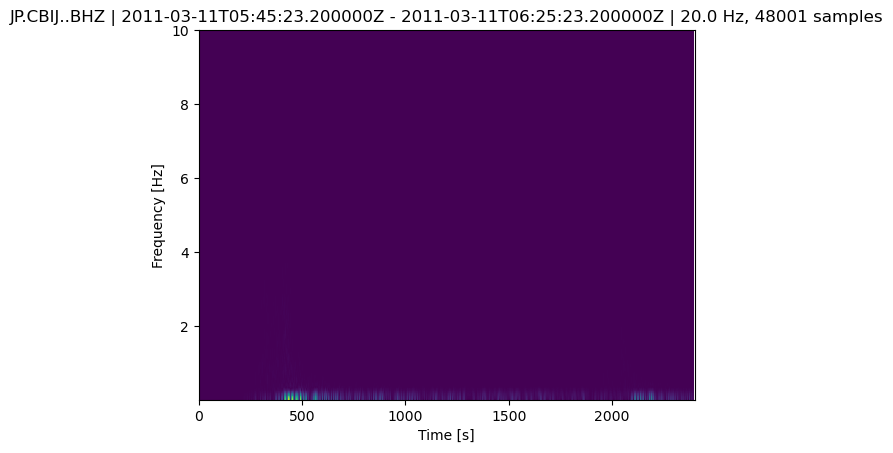

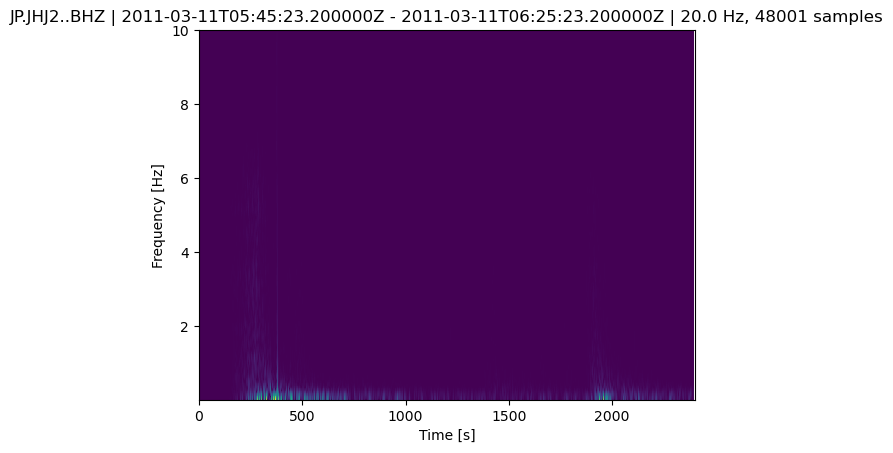

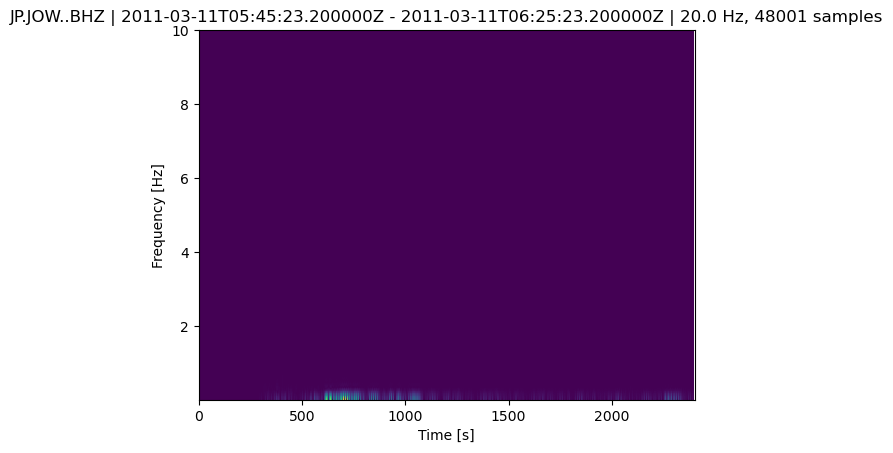

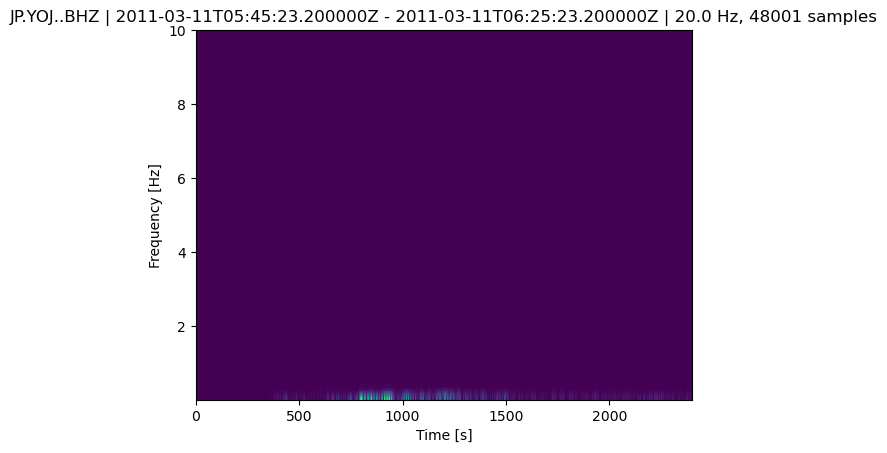

[None, None, None, None, None]

In [15]:
st.spectrogram()

The code in the cells below is gathering data on all earthquakes that have occured near Japan and have been measured. From this I can gain a generalised picture of the seismicity of Japan to compare to the large Tohoku earthquake that occured.


In [16]:
os.system('FetchEvent --lon 125:145 --lat 30:45 --mag 5:10 -o JPSUBD.eve')


Received 474.7 KB (compressed from 5.6 MB) of event information in 19.0 seconds (25.0 KB/s)
Processed event information for 4966 events, 4966 origins in 52.8 seconds (9.0 KB/s)
DONE at 2023-08-22 06:42:42


0

In [17]:
df = pd.read_csv("JPSUBD.eve",sep="|",header=None)


In [18]:
print(df.head()) 
df_np = df.to_numpy()


          0                         1        2         3        4   
0  11731311  2023/08/11 00:14:33.205   41.1195  142.8223   34.000  \
1  11729745  2023/08/06 18:12:41.603   30.7578  131.4022   12.851   
2  11719839  2023/07/13 04:43:54.456   40.0670  142.7592   35.000   
3  11713962  2023/06/27 23:38:21.428   42.0836  133.9943  442.000   
4  11711224  2023/06/20 23:33:47.635   33.7277  136.0713  410.377   

                 5         6   
0  us,usauto,pt,at  NEIC PDE  \
1        usauto,us  NEIC PDE   
2               us  NEIC PDE   
3        us,usauto  NEIC PDE   
4               us  NEIC PDE   

                                                   7           8   
0  us,usauto6000kz5s,us6000kz5s,pt23223000,at00rz...  mww,5.8,us  \
1                       us,usauto6000kyb4,us6000kyb4  Mww,5.5,us   
2                                      us,us7000kfbs  Mww,5.0,us   
3                       us,usauto6000knj0,us6000knj0  Mww,5.8,us   
4                                      us,us7000k9zd

The map below shows a projection of the locations on the surface of all the earthquakes that have been measured. As you can see most earthquakes happen off the East coast of Japan. This is a subduction zone where the pacific plate is subducting under Japan. This is likely the reason for the seismicity in this region.

However, there is also a region of seismicity on the West coast of Japan, in the sea between Japan and mainland Asia. This seismicity is likely due to crustal extension rather than subduction tectonics seen on the East coast. This is because as the Pacific plate subducts off the Eat coast of Japan a process called slab roll back occurs where the hinge of the subducting pacific plate moves further Eastward away from Japan. As Japan is conjoined to the Pacific plate it is stretched and extened Westward. This extension thins the lithosphere of the Japanese mainland predominantly on the West side. This creates this back arc basin seen. The extension is accomadated by thinning of the Japenese lithopshere as well as normal faulting. Therefore, the seismicity off the West coast of Japan is due to the formation of the back arc basin.

As seen above the Tohoku earthquake of 2011 occured off the East coast of Japan, so it cause is very likely related to the subduction zone. This concurs with the very large magnitude of 9.1 as subduction zones generally form the largest magnitude earthquakes.


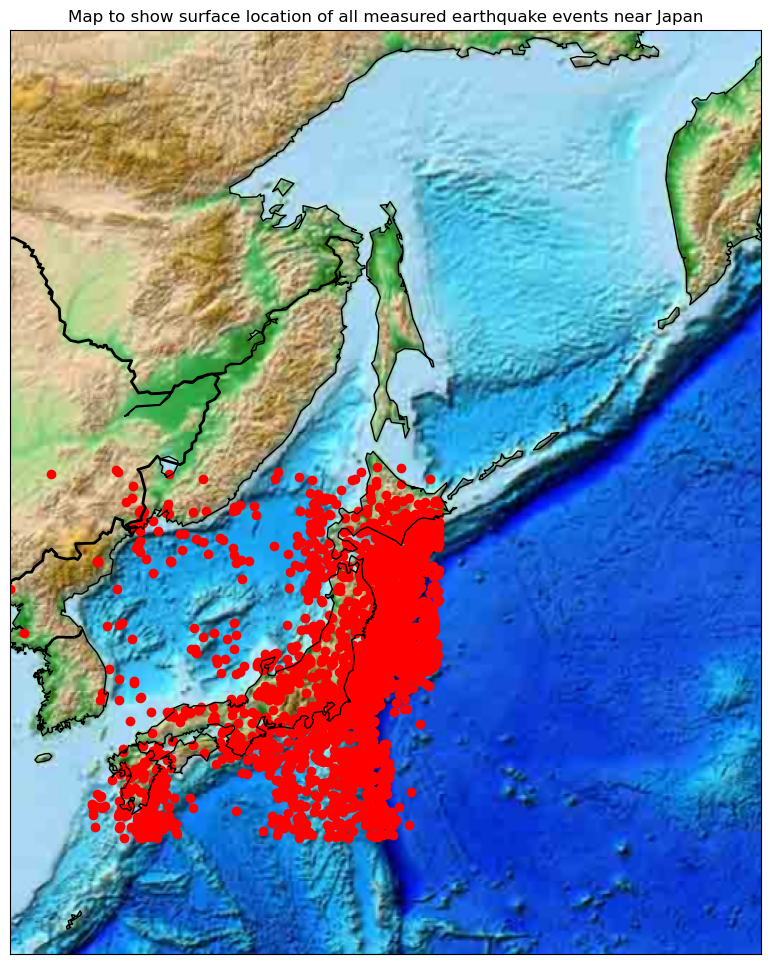

In [39]:
fig = plt.figure(figsize=(12,12))

m = Basemap(projection='mill',llcrnrlat = 25,
            llcrnrlon = 125,
            urcrnrlat = 60,
            urcrnrlon = 160,
            lat_ts=20,
            resolution='l'
        
)

m.drawcoastlines()
m.drawcountries(linewidth=2)

#m.fillcontinents(color='green',lake_color='aqua')
#m.drawmapboundary(fill_color='aqua')

m.scatter(df_np[:,3], df_np[:,2], latlon=True, color='red')
#m.bluemarble()

m.etopo()


plt.title("Map to show surface location of all measured earthquake events near Japan")
plt.show()


The plot below shows the location of earthquakes measured along all the longitdues of Japan. I chose to plot latitude with depth rather than longitude as the subduction zones runs more closely to parallel with latitude lines than longitude lines.

On the plot below the yellow star represents the Tohoku earthquake event. As you can see it is fairly shallow, so is likely a reason for why the earthquake was so devastating. Most earthquakes occur below 100km, therefore the earthquake occurs in the brittle lithopshere due to fracturing. The Tohoku earthquake falls in this range so the cause is likely due to some sort of brittle failure of the lithopshere at the subduction zone.

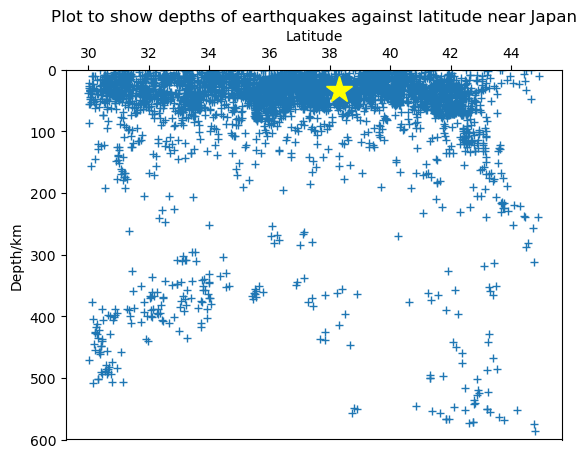

In [40]:
plt.plot(df[2], df[4], '+')
plt.plot(38.296, 32, "*", color="yellow", markersize=20)
plt.xlabel('Latitude')
plt.ylabel('Depth/km')
plt.ylim(600, 0)
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position("top")
plt.title("Plot to show depths of earthquakes against latitude near Japan")
plt.show()

This last 3D plot gives a view of all measured earthquake events near or within Japan. Of most interest is seeing how the depth of earthquakes generally increases as longitude decreases(move Westward). This conforms with the subduction ideology of the region. As the Pacific plate subducts under Japan in a Westward direction, the Pacific plate must become deeper as you move Westward. Therefore, this plot gives some initial proof of a subduction zone of the East coast of Japan.

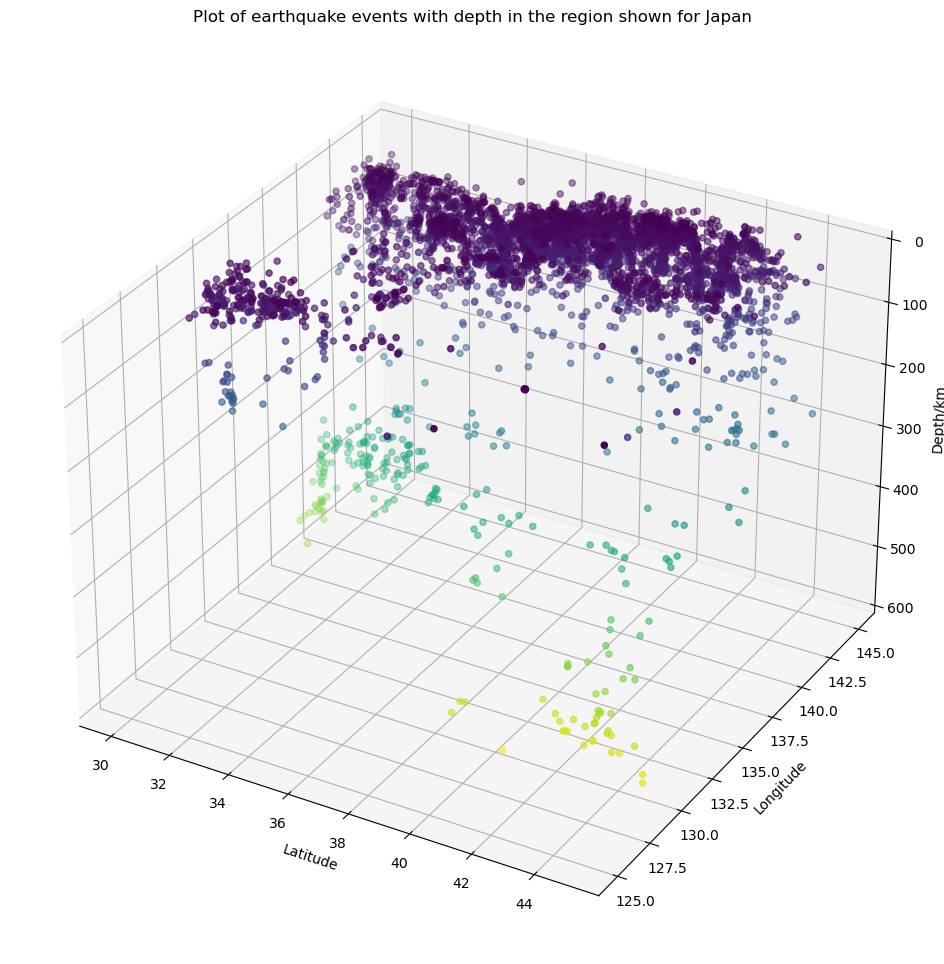

In [41]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(600, 0)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Depth/km')
ax.set_title("Plot of earthquake events with depth in the region shown for Japan")
ax.scatter(df[2], df[3], df[4], c=df[4], cmap="viridis")

Overall, from this small project I have looked at the Tohoku earthquake of 2011 in respect to the local tectonic setting. From my analysis I can see that the Pacific plate is subducting under Japan and this is the likely cause for the earthquake studied. However, seismicity also occurs off the Other side of Japan due to the creation of a back arc basin, caused by the subduction zone to the East of Japan. Also, I have discovered, that one of the main components to background noise for seismometers in Japan is likely the noise generated by waves breaking on the beach. Overall, it is clear to see that Japan is a very active tectonic region, therefore the strict guidelines they impose in the country based on earthquake protection is very sensible.